#**Trivago-Marketplace Data Analysis**
---
#####**Welcome! Explore the mystery in the data**

> By Paras Khulbe













##**Importing the libraries**



In [24]:
import pandas as pd #For data analysis using the dataframe structure to frame the data in memory
import matplotlib.pyplot as plt
import seaborn as sns


##**Loading the data**


In [25]:
df = pd.read_csv("marketplace_anon_2019.csv")

### **Understanding the Data**

In [26]:
df.head() #Overviewing the data through the sample records

,date,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
0,2019-01-06,short,117272,68608,27152,113299,61987,21848,5664,2651,1311,864767,423745,197976
1,2019-01-06,medium,96050,12415,137291,74761,7483,111740,3738,386,5343,565066,60799,812847
2,2019-01-06,long,7060,9568,408676,3407,4796,327505,170,184,9813,27480,27867,1506297
3,2019-01-13,short,109700,64097,25477,105743,57771,20462,5277,2467,1225,794086,387316,193915
4,2019-01-13,medium,128847,16787,172639,101018,10201,140393,5049,526,6766,795529,80124,1020371


####Provided Dataset Description

*   Given dataset is the trivago daily performance data for a certain country for the entire year of 2019
*   Advertiser can control their bids differently for 3 market segments defined by the time-to-travel(TTT) i.e. the number of days between the data a reservation is made and the corresponding check-in date. The 3(TTT) segments are :-

1. short: 0 to 14 days

2. medium: 15 to 60 days

3. long: more than 60 days


*   Given is the data for 3 of the main advertisers in this market, identified only as advertisers as "A", "B" and "C"


*   For each of the 3 advertisers, provided the following metrics :-


> clicks: number of clicks made by trivago users


> cost: amount of money paid by advertisers to trivago (unders a cost-per-click model)


> bookings: number of hotel reservations made by trivago users


> bookings_rev: amount spent by users on hotel reservations (gross revenue for advertisers)




























##**Preparing Data**

###**Cleaning data**

In [27]:
df.head() #Reviewing the data for cleaning

,date,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
0,2019-01-06,short,117272,68608,27152,113299,61987,21848,5664,2651,1311,864767,423745,197976
1,2019-01-06,medium,96050,12415,137291,74761,7483,111740,3738,386,5343,565066,60799,812847
2,2019-01-06,long,7060,9568,408676,3407,4796,327505,170,184,9813,27480,27867,1506297
3,2019-01-13,short,109700,64097,25477,105743,57771,20462,5277,2467,1225,794086,387316,193915
4,2019-01-13,medium,128847,16787,172639,101018,10201,140393,5049,526,6766,795529,80124,1020371


In [28]:
#Investigating for the missing data
df.isnull().sum()

date             0
ttt_group        0
clicks_A         0
clicks_B         0
clicks_C         0
cost_A           0
cost_B           0
cost_C           0
bookings_A       0
bookings_B       0
bookings_C       0
booking_rev_A    0
booking_rev_B    0
booking_rev_C    0
dtype: int64

In [29]:
#Investigating for the consistency in the categorical datafield i.e. ttt-group
df['ttt_group'].unique()

array(['short', 'medium', 'long'], dtype=object)

###**Reshaping the data**

#####Re-structuring the data

In [30]:
df.dtypes #Reviewing for the appropriate datatype of each field

date             object
ttt_group        object
clicks_A          int64
clicks_B          int64
clicks_C          int64
cost_A            int64
cost_B            int64
cost_C            int64
bookings_A        int64
bookings_B        int64
bookings_C        int64
booking_rev_A     int64
booking_rev_B     int64
booking_rev_C     int64
dtype: object

In [31]:
df['date']=df['date'].astype('datetime64[ns]') #Transforming to more structured datatype for better processing
df.dtypes #Reviewing 

date             datetime64[ns]
ttt_group                object
clicks_A                  int64
clicks_B                  int64
clicks_C                  int64
cost_A                    int64
cost_B                    int64
cost_C                    int64
bookings_A                int64
bookings_B                int64
bookings_C                int64
booking_rev_A             int64
booking_rev_B             int64
booking_rev_C             int64
dtype: object

#####Re-organizing the data

In [32]:
df.head() #Reviewing the data for organizing the records

,date,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
0,2019-01-06,short,117272,68608,27152,113299,61987,21848,5664,2651,1311,864767,423745,197976
1,2019-01-06,medium,96050,12415,137291,74761,7483,111740,3738,386,5343,565066,60799,812847
2,2019-01-06,long,7060,9568,408676,3407,4796,327505,170,184,9813,27480,27867,1506297
3,2019-01-13,short,109700,64097,25477,105743,57771,20462,5277,2467,1225,794086,387316,193915
4,2019-01-13,medium,128847,16787,172639,101018,10201,140393,5049,526,6766,795529,80124,1020371


In [33]:
df.sort_values(by='date',ascending=True,inplace=True) #Organizing the data with the time sequence
df.head()#Reviewing

,date,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
314,2019-01-01,long,4945,7970,301992,2378,4068,242810,118,153,7231,19093,23636,1190356
313,2019-01-01,medium,61201,8115,81676,47501,4893,65722,2373,252,3167,371986,39742,512900
312,2019-01-01,short,110658,62984,23897,107515,57033,19170,5359,2440,1157,815380,374662,173965
473,2019-01-02,long,4202,6524,284020,2022,3317,231466,101,125,6807,15838,18765,1138882
472,2019-01-02,medium,59130,8040,79556,45954,4869,64165,2294,250,3086,360364,39281,474731


In [34]:
df.set_index('date',drop=True,inplace=True) #setting the index from integer to more functional one
df.head() #Reviewing

,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
date,,,,,,,,,,,,,
2019-01-01,long,4945,7970,301992,2378,4068,242810,118,153,7231,19093,23636,1190356
2019-01-01,medium,61201,8115,81676,47501,4893,65722,2373,252,3167,371986,39742,512900
2019-01-01,short,110658,62984,23897,107515,57033,19170,5359,2440,1157,815380,374662,173965
2019-01-02,long,4202,6524,284020,2022,3317,231466,101,125,6807,15838,18765,1138882
2019-01-02,medium,59130,8040,79556,45954,4869,64165,2294,250,3086,360364,39281,474731



##**Section for User defined functions**



In [35]:
#Sorted with the using sequence
def calc_daily_aggregate():
  df['total_clicks'] = df['clicks_A'] + df['clicks_B'] + df['clicks_C'] #Adding daily clicks for each market segment
  df['total_bookings'] = df['bookings_A'] + df['bookings_B'] + df['bookings_C'] #Adding daily bookings count for each market segment
  df_daily_aggregrate = df[['total_clicks','total_bookings']].groupby(by='date').sum() #Adding everyday clicks and booking counts combining every market segments 
  df_daily_aggregrate['booking_conversion(%)'] = (df_daily_aggregrate['total_bookings'] / df_daily_aggregrate['total_clicks'] * 100) #Calculating daily percentage of total booking conversion from total daily clicks
  return df_daily_aggregrate

def calc_yearly_aggregate():
  df_yearly_aggregate= df[['ttt_group','total_clicks','total_bookings']].groupby(by='ttt_group').sum()#calculating volume of traffic and booking counts for each market segmnent
  return df_yearly_aggregate

def calc_advertisers_yearly_profit():
  #calculting net profit of each advertisers corresponding to their names
  d = {'advertisers': ['A','B','C'], 'profit(%)': [ 0.15 * df['booking_rev_A'].sum(), 0.15 * df['booking_rev_B'].sum(),0.15 * df['booking_rev_C'].sum()]}
  df_annual_profit = pd.DataFrame(data=d)
  df_annual_profit.set_index('advertisers',drop=True,inplace=True)
  return df_annual_profit

##**Analyzing the data**



###**1. Market Trends**

Text(0.5, 1.0, 'Booking Conversion - 2019')

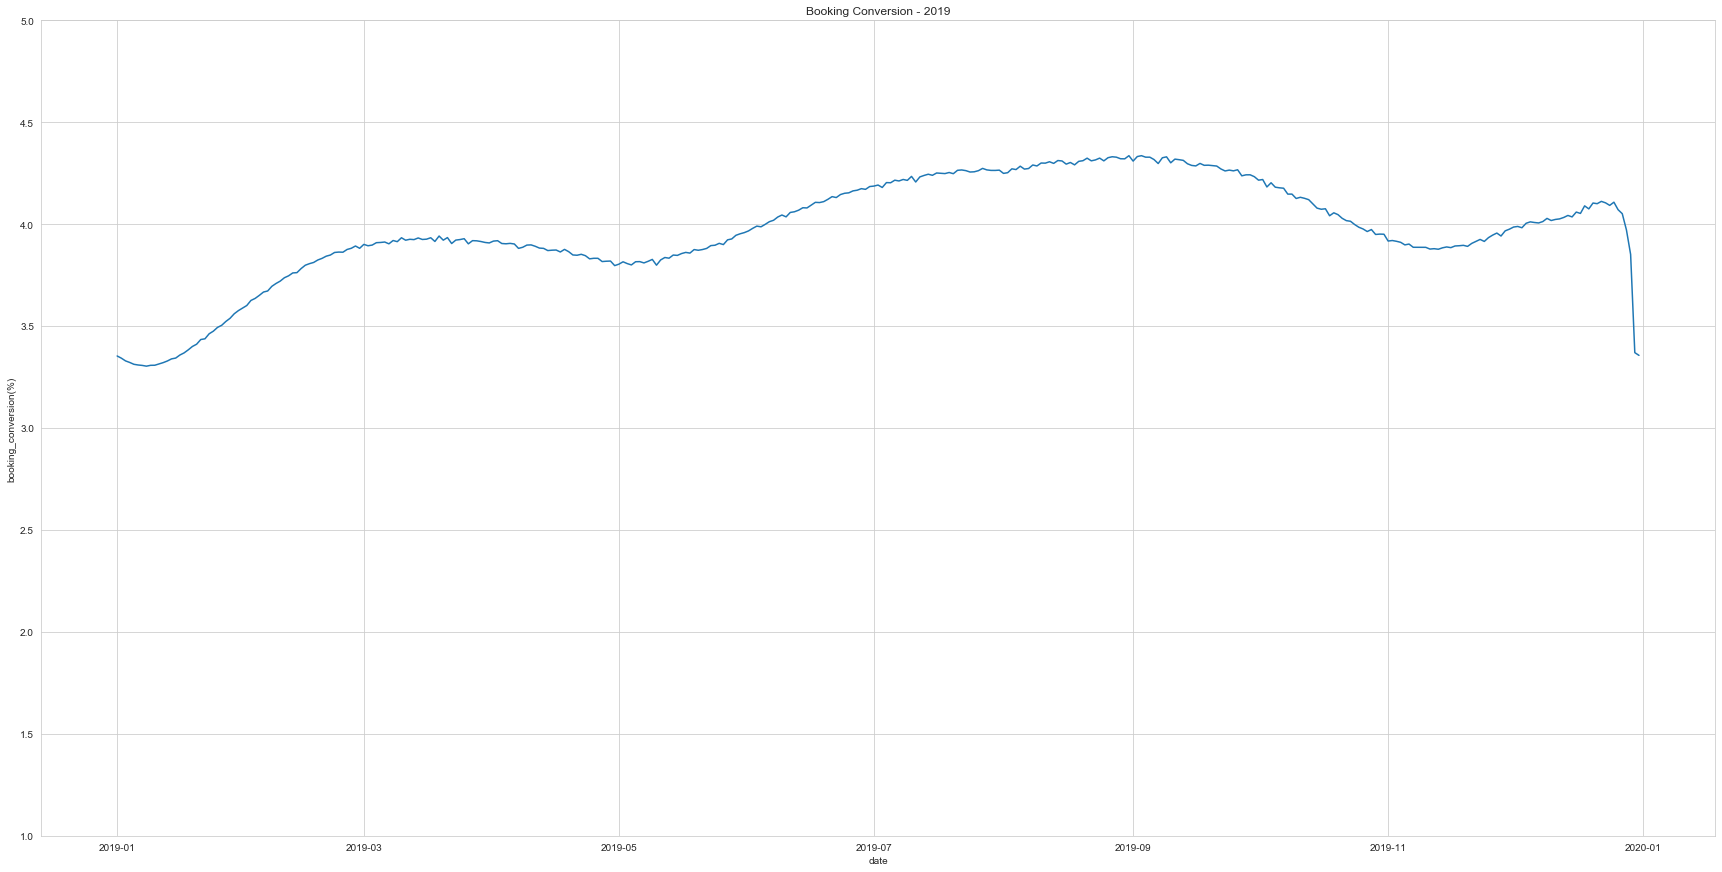

In [36]:
#Task 1: a) Plot the aggregated daily booking conversion for the entire year 
df_daily_aggregate = calc_daily_aggregate()

sns.set_style("whitegrid") #setting the mapping lines
plt.figure(figsize=(30,15)) #setting the plot size

plt.ylim(1*1,5*1)
sns.lineplot(data=df_daily_aggregate,x=df_daily_aggregate.index,y="booking_conversion(%)") #visualizing the tabular data through lineplot
plt.title("Booking Conversion - 2019") #customizing the plot

<Figure size 432x288 with 0 Axes>

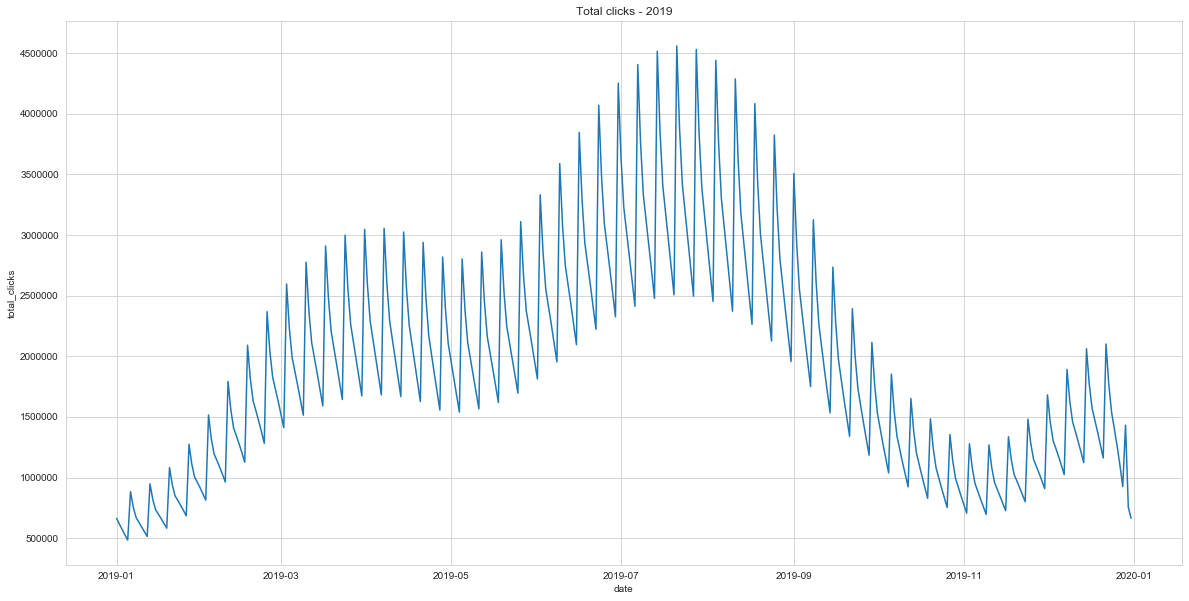

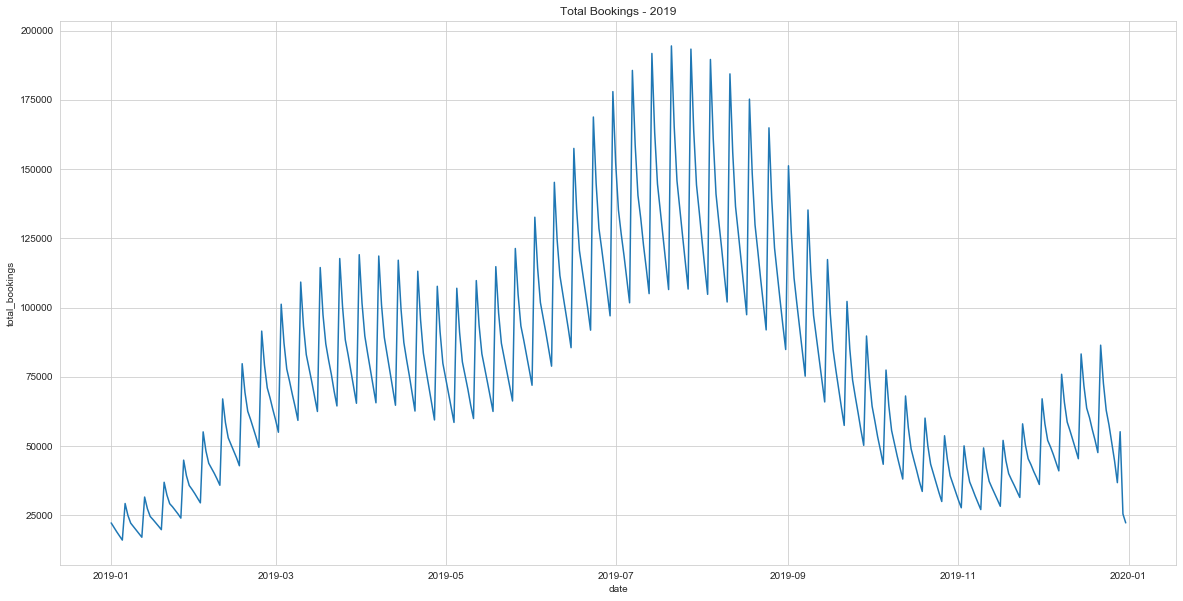

In [37]:
#Plotting daily booking count and total clicks

plt.figure(0)
plt.figure(figsize=(20,10))
sns.lineplot(data=df_daily_aggregate,x=df_daily_aggregate.index,y="total_clicks") #visualizing the tabular data through lineplot
plt.title("Total clicks - 2019") #customizing the plot

plt.figure(1)
plt.figure(figsize=(20,10))
sns.lineplot(data=df_daily_aggregate,x=df_daily_aggregate.index,y="total_bookings") #visualizing the tabular data through lineplot
plt.title("Total Bookings - 2019") #customizing the plot

plt.show()


b) Based on the data that you have available, what is the main driver for the trends that you observed on the chart from the previous question?

**Trend Description: Booking conversion is almost constant equals to (3-4)% through out the year. Booking counts seems to be almost throughout proportional to the volume of traffic in the entire year, that is driving this constant trend in conversion rate.**

<Figure size 432x288 with 0 Axes>

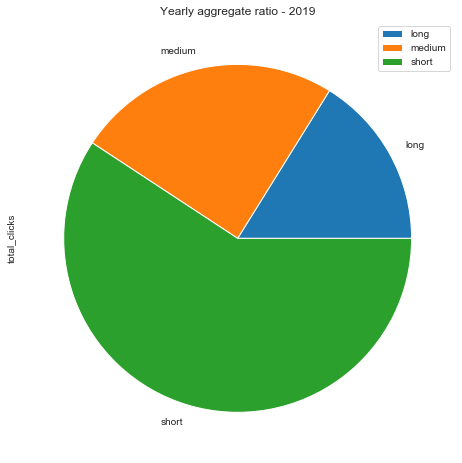

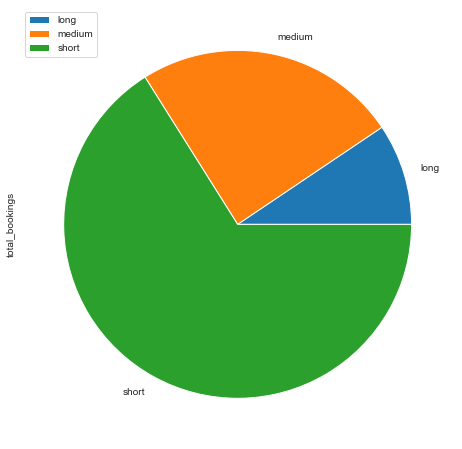

In [38]:
#Yearly Aggregate ratio
df_yearly_aggregate= calc_yearly_aggregate() 

plt.figure(0)
df_yearly_aggregate.plot.pie(y="total_clicks",figsize=(8,8))
plt.title("Yearly aggregate ratio - 2019")

plt.figure(1)
df_yearly_aggregate.plot.pie(y="total_bookings",figsize=(8,8))

plt.show("A")


Text(0.5, 1.0, 'Total clicks - 2019')

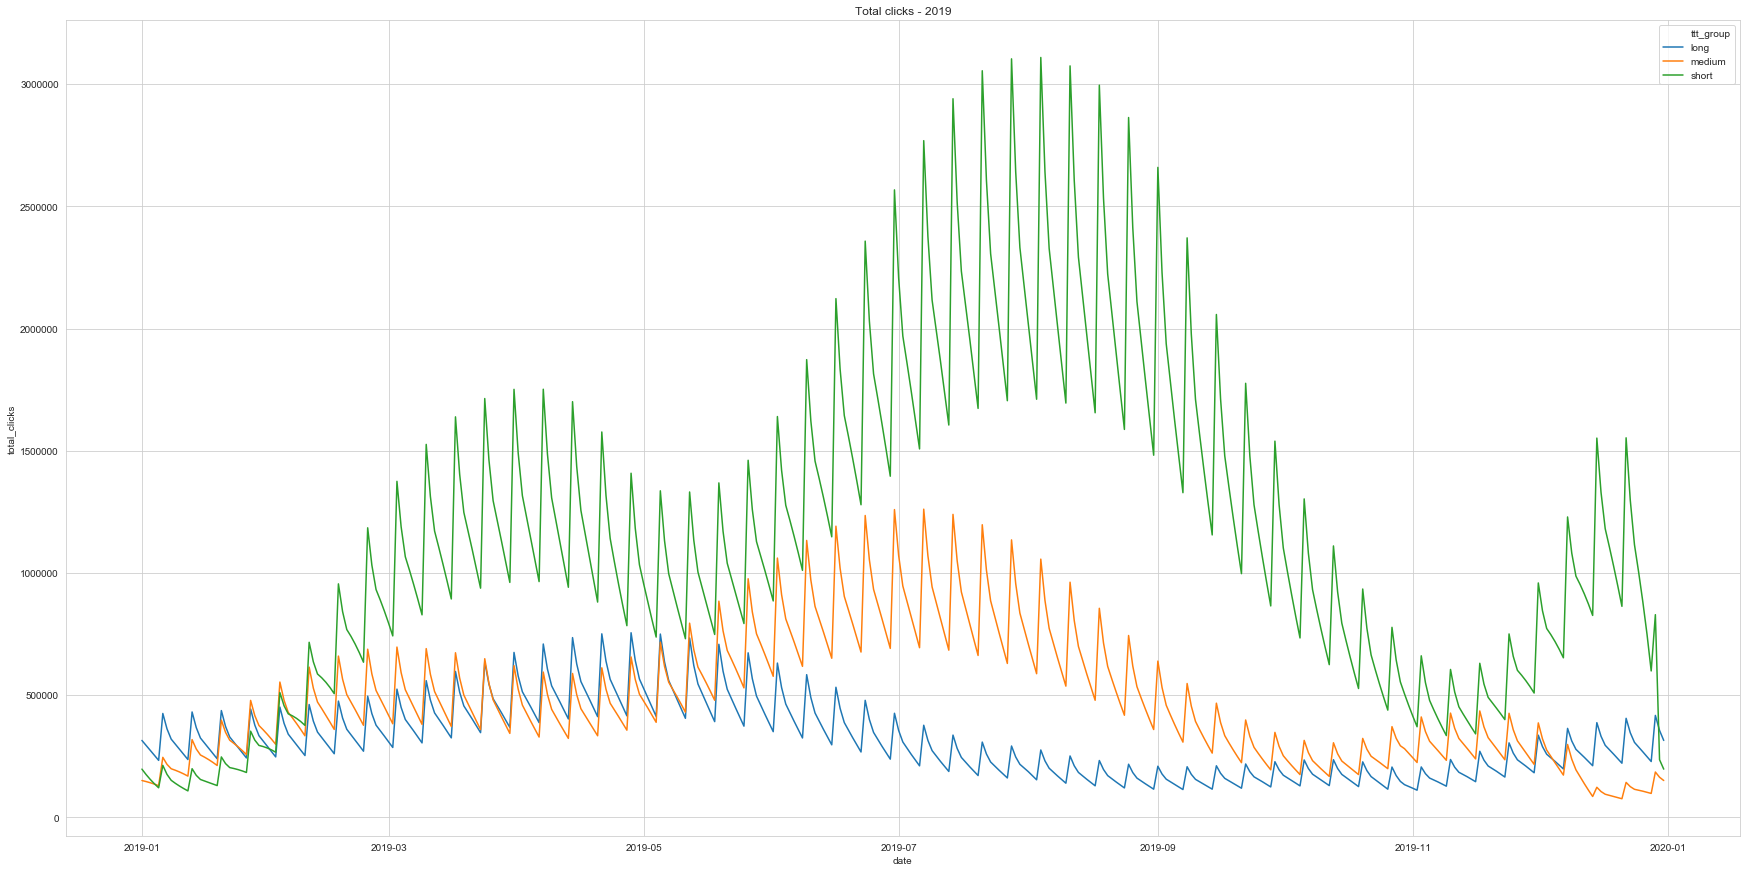

In [39]:
#Total daily clicks throughout the year for each market segment
plt.figure(figsize=(30,15))
sns.lineplot(data=df,x=df.index,y="total_clicks",hue="ttt_group")
plt.title("Total clicks - 2019")


Text(0.5, 1.0, 'Total bookings - 2019')

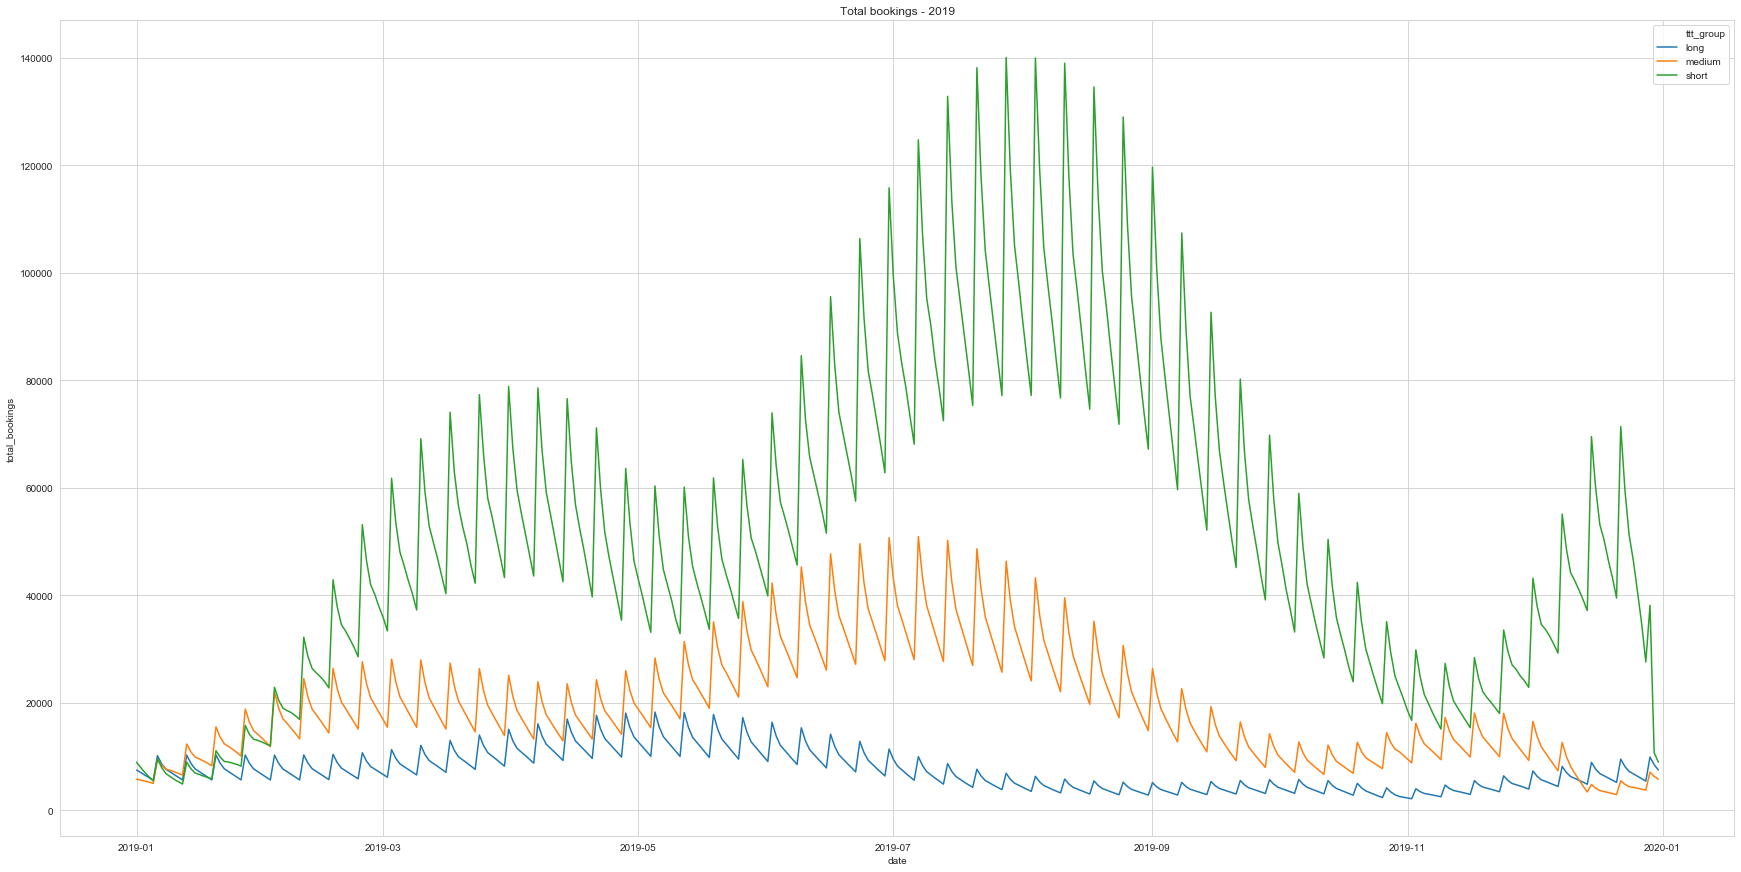

In [40]:
#Total daily bookings for the entire year for each market segment
plt.figure(figsize=(30,15))
sns.lineplot(data=df,x=df.index,y="total_bookings",hue="ttt_group")
plt.title("Total bookings - 2019")

c. Given the values and patterns in the data can you guess which country this is? How do you inform your guess?

**Ans: From exploring over the data, there seems to be two peak season. The peak of the bigger season falls in the month of october and the peak of another big season falls in April.<br> 
Germany is one of the option which is fulfilling this criteria of April and October season by checking over the internet source.**

###**2. Advertiser Performance**

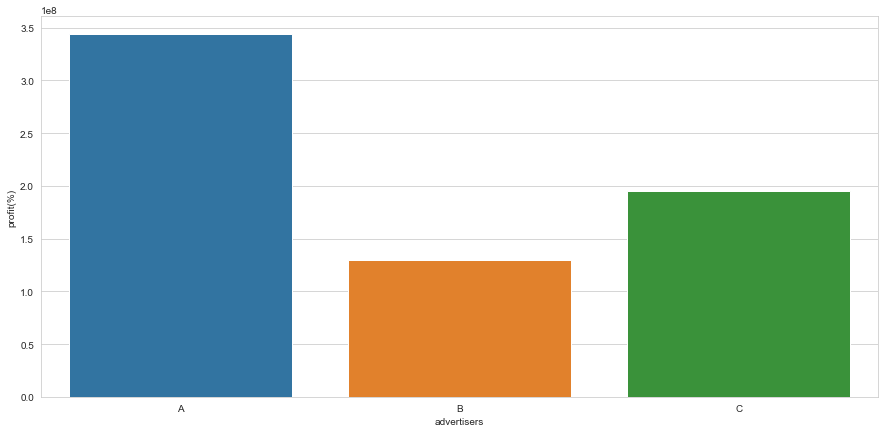

In [41]:
#Taske 2: a) Assuming a constant margin of 15% (across advertisers and market segments) over the booking revenue, 
#calculate the total profit of each advertiser for the entire period.
df_annual_profit = calc_advertisers_yearly_profit()
plt.figure(figsize=(15,7))
sns.barplot(data=df_annual_profit,y="profit(%)", x=df_annual_profit.index)

b) Based on the trends you observe in the data 
what recommendations would you give each of the 3 advertisers 
to improve their campaign in 2020?<br><br>

**Ans: By executing below cells, we can see the volume of incoming traffic and their booking conversion for each advertiser thorughout the year. For specificity, there are lot of other complexities to be studied. Below are the generic recommendations for each advertiser.<br><br>*For C* : C need to improve its campaign focussed on availiing the requirement of short market segment with a competitive pitching.<br>*For B* : In the same way, B needs to focussed on competitivenes on all the three market segment.<br>*For A* : A has the scope of improving in hitting the traffic of long market segment.**


<Figure size 432x288 with 0 Axes>

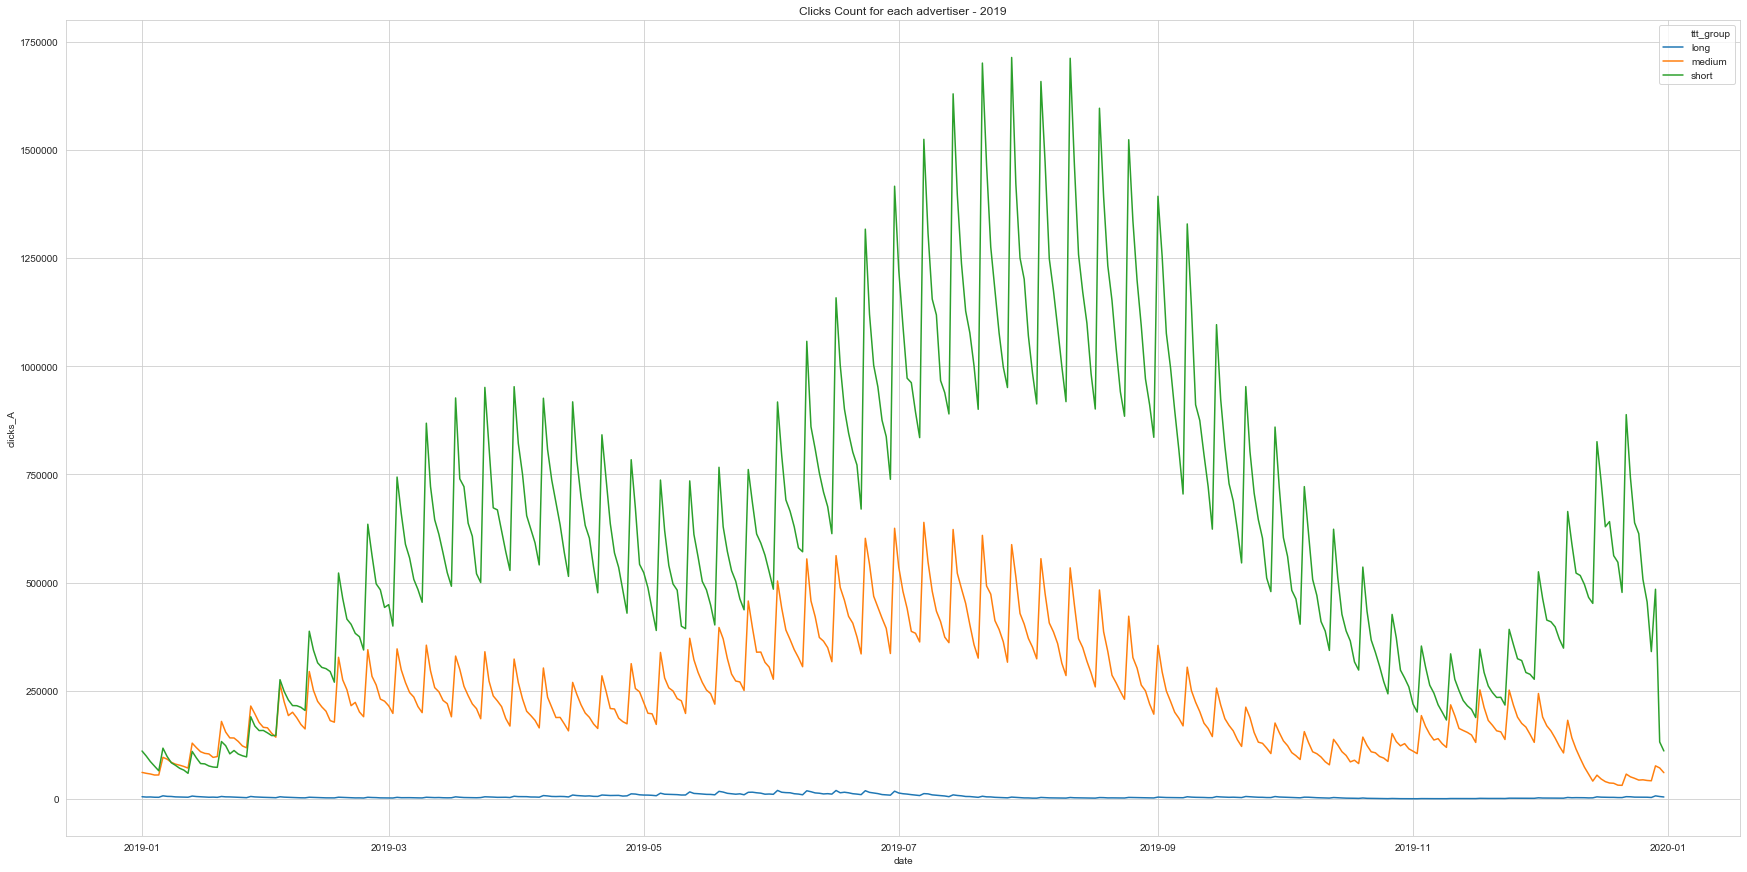

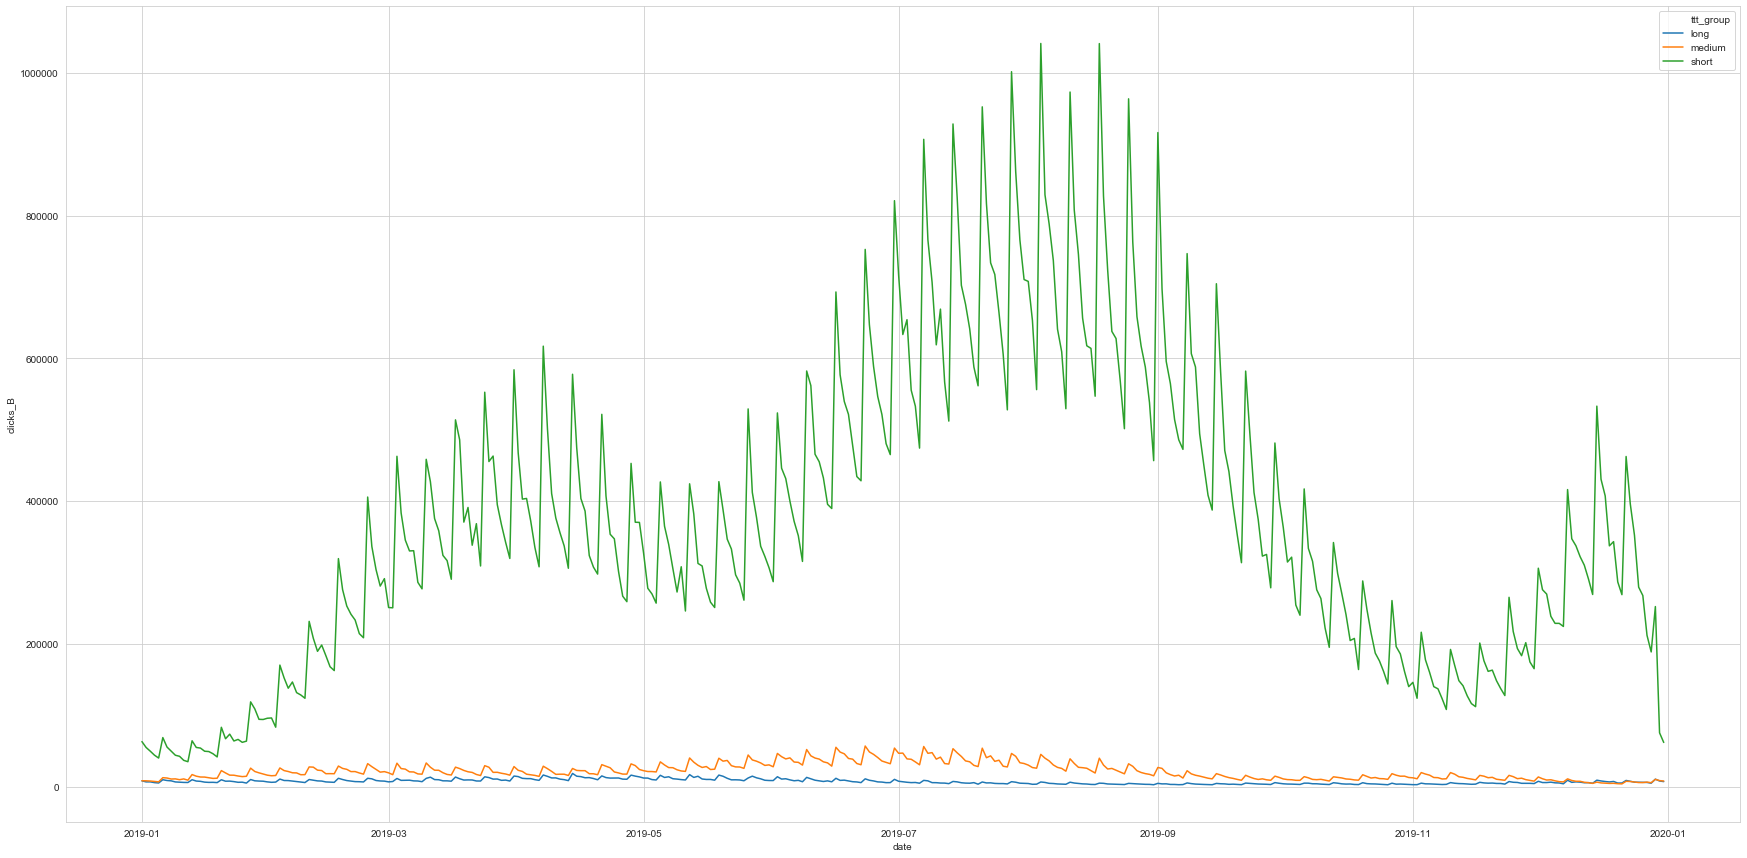

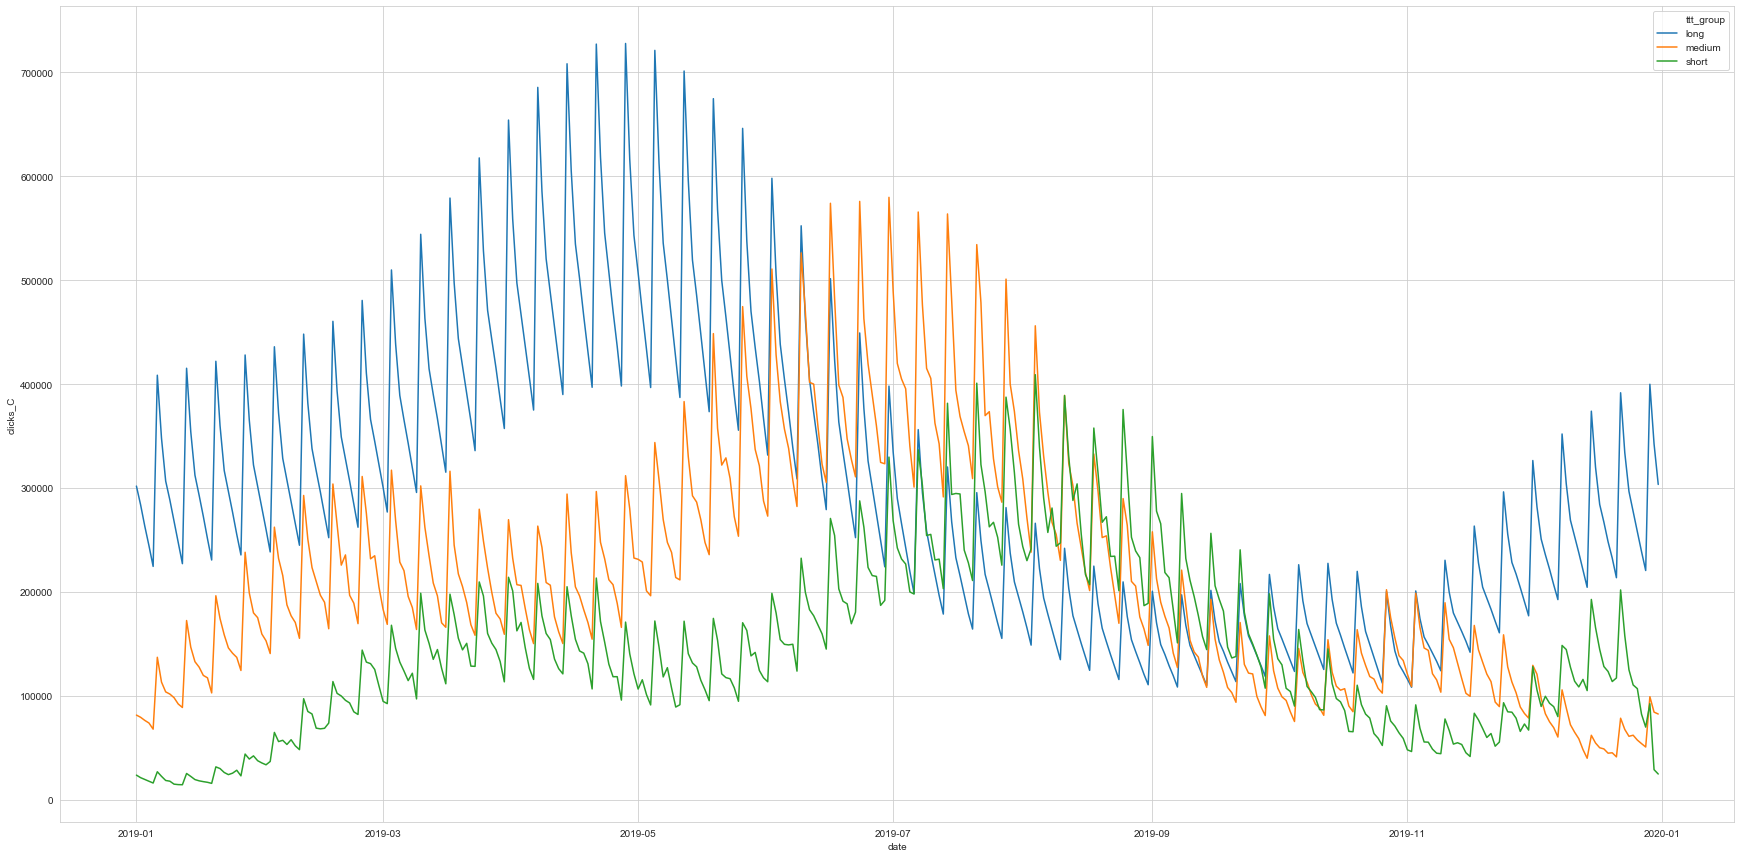

In [42]:
#let's explore the clicks count for each advertiser 
plt.figure(0)
plt.figure(figsize=(30,15))
plt.title("Clicks Count for each advertiser - 2019")
sns.lineplot(data=df, y='clicks_A', x=df.index, hue = "ttt_group") # long market segment traffic 

plt.figure(1)
plt.figure(figsize=(30,15))
sns.lineplot(data=df, y='clicks_B', x=df.index, hue = "ttt_group") # long market segment traffic

plt.figure(2)
plt.figure(figsize=(30,15))
sns.lineplot(data=df, y='clicks_C', x=df.index, hue = "ttt_group") # long market segment traffic 


plt.show()

<Figure size 432x288 with 0 Axes>

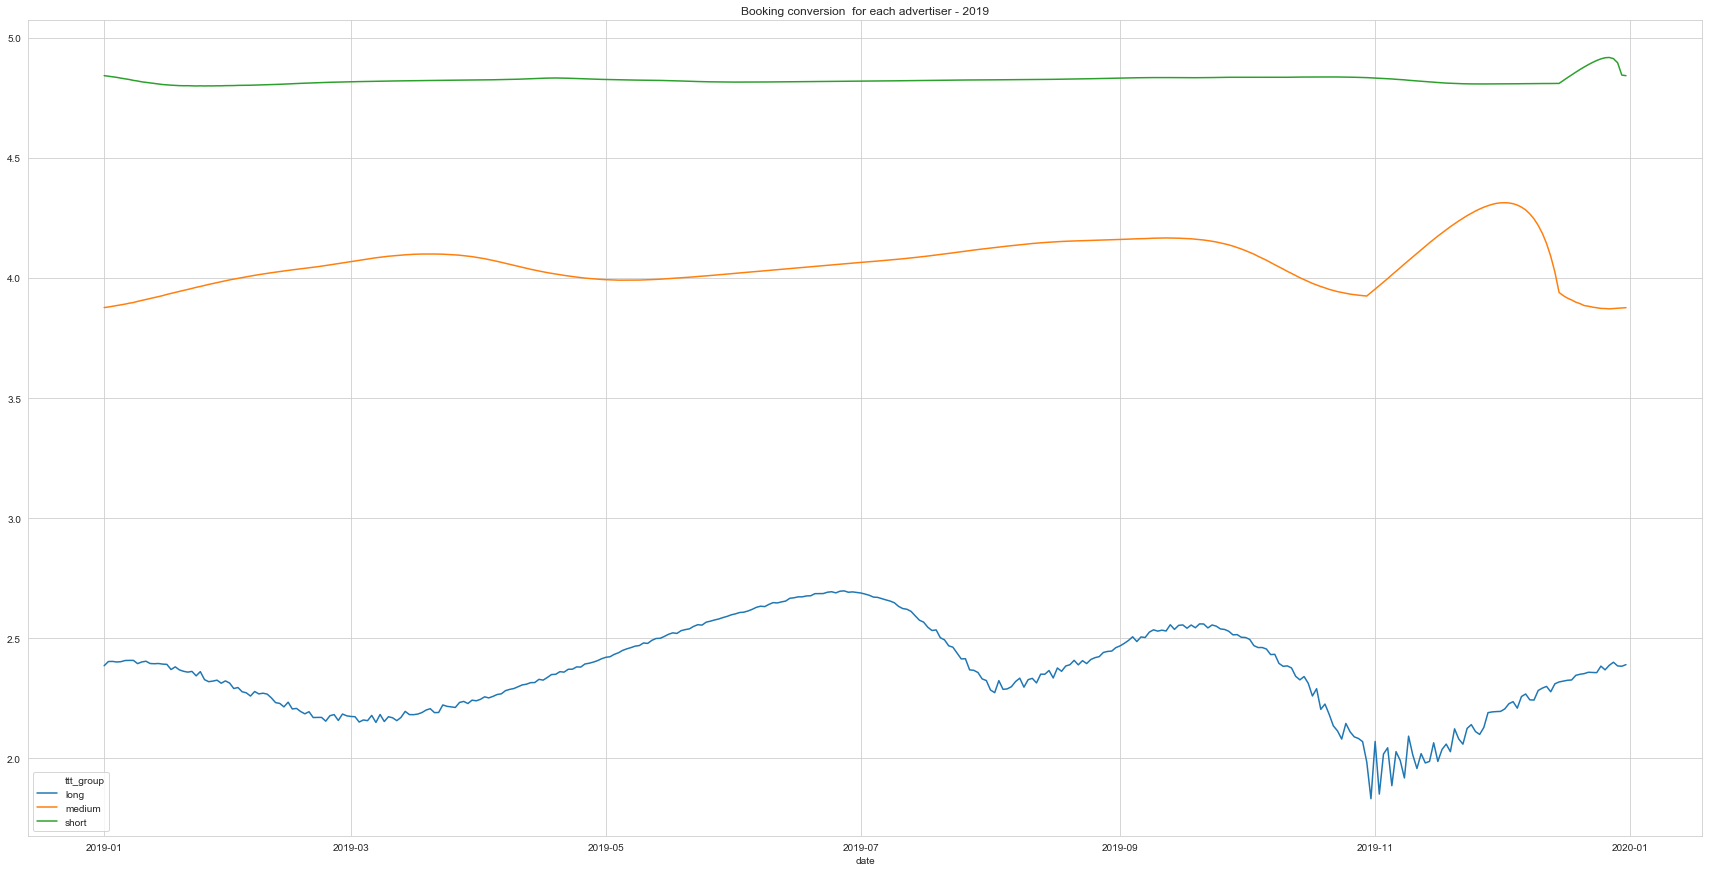

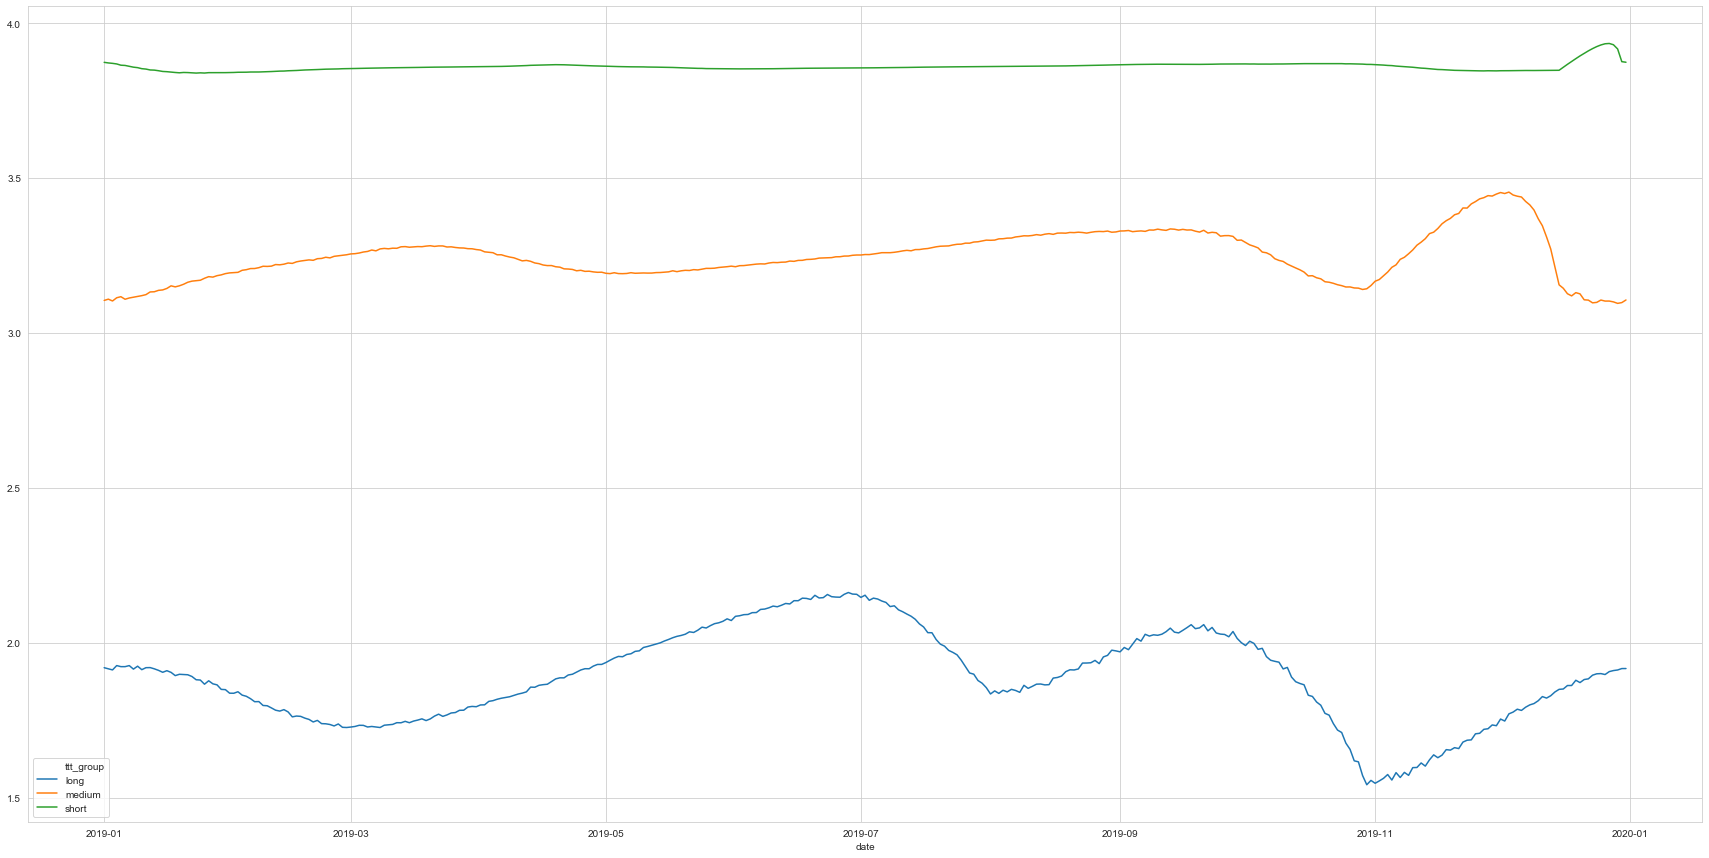

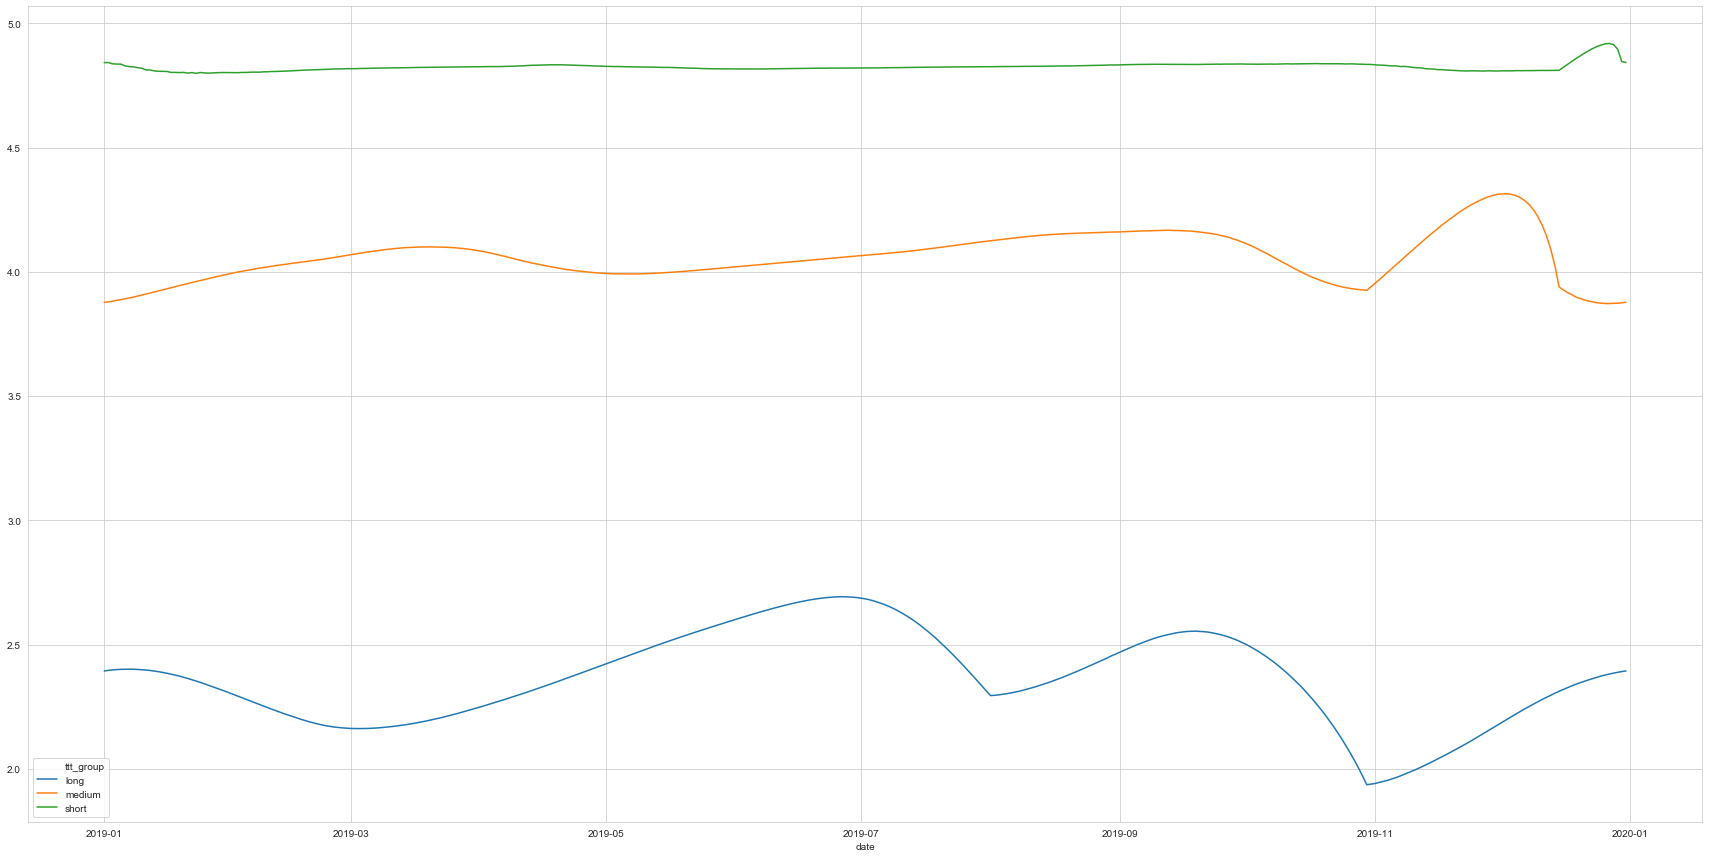

In [43]:
#let's explore the booking conversion for each advertiser 
plt.figure(0)
plt.figure(figsize=(30,15))
plt.title("Booking conversion  for each advertiser - 2019")
sns.lineplot(data=df, y=df['bookings_A']*100/df['clicks_A'], x=df.index, hue = "ttt_group") # long market segment traffic 

plt.figure(1)
plt.figure(figsize=(30,15))
sns.lineplot(data=df, y=df['bookings_B']*100/df['clicks_B'], x=df.index, hue = "ttt_group") # long market segment traffic

plt.figure(2)
plt.figure(figsize=(30,15))
sns.lineplot(data=df, y=df['bookings_C']*100/df['clicks_C'] , x=df.index, hue = "ttt_group") # long market segment traffic 


plt.show()